# Spam Message Classification

### 1. Data Preprocessing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('spam.tsv', sep='\t')

In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.shape

(5572, 4)

In [8]:
#Check Missing values
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [10]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [11]:
df['label'].value_counts()/(len(df)) * 100

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

this is an example of inbalanced dataset

#### Balancing the dataset

In [12]:
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

In [13]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [14]:
ham = ham.sample(spam.shape[0])

In [15]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [16]:
data = pd.concat([ham, spam], ignore_index=True)

In [17]:
data.shape

(1494, 4)

In [18]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

#### EDA

In [19]:
data.head()

,label,message,length,punct
0,ham,";-( oh well, c u later",22,4
1,ham,Yes:)from last week itself i'm taking live call.,48,4
2,ham,How dare you stupid. I wont tell anything to y...,82,5
3,ham,"Hi this is yijue, can i meet u at 11 tmr?",41,2
4,ham,I'm not. She lip synced with shangela.,38,3


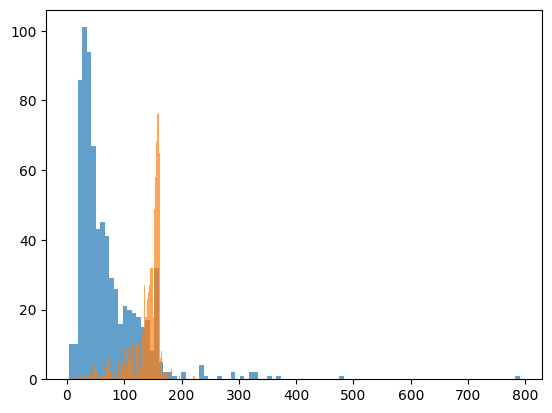

In [20]:
plt.hist(data[data['label'] == 'ham']['length'], bins=100,alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins=100,alpha=0.7)
plt.show()

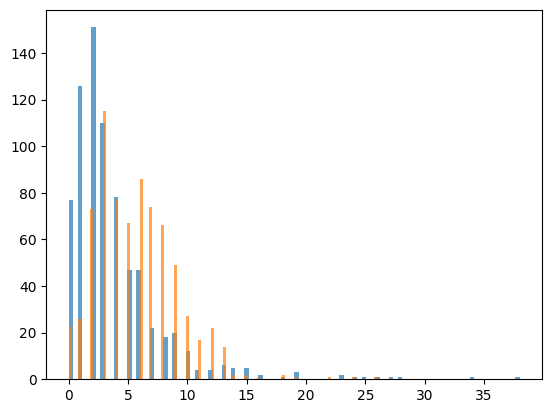

In [21]:
plt.hist(data[data['label'] == 'ham']['punct'], bins=100,alpha=0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins=100,alpha=0.7)
plt.show()

### Data splitting

In [22]:
data.head()

,label,message,length,punct
0,ham,";-( oh well, c u later",22,4
1,ham,Yes:)from last week itself i'm taking live call.,48,4
2,ham,How dare you stupid. I wont tell anything to y...,82,5
3,ham,"Hi this is yijue, can i meet u at 11 tmr?",41,2
4,ham,I'm not. She lip synced with shangela.,38,3


In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data['message'],data['label'], test_size=0.3, random_state=0)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1045,), (449,), (1045,), (449,))

### 2. Building the Model (Random Forest)

Since, we are dealing with textual data, we have to do some encoding before applying the model

For this we will go with OneEncoding using TD-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [33]:
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier",RandomForestClassifier(n_estimators=10))])


In [34]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

### 3. Predicting the results (Random Forest)

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
        'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
        'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',

#### Metrics

In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [38]:
accuracy_score(y_test, y_pred)

0.9153674832962138

In [39]:
confusion_matrix(y_test, y_pred)

array([[220,   7],
       [ 31, 191]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.88      0.97      0.92       227
        spam       0.96      0.86      0.91       222

    accuracy                           0.92       449
   macro avg       0.92      0.91      0.92       449
weighted avg       0.92      0.92      0.92       449



### 4. Building the Model (SVM)

In [42]:
from sklearn.svm import SVC

In [43]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [44]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

### 5. Predicting the result(SVM)

In [45]:
y_pred2 = svm.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred2)

0.9376391982182628

In [47]:
confusion_matrix(y_test, y_pred2)

array([[223,   4],
       [ 24, 198]], dtype=int64)

In [48]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         ham       0.90      0.98      0.94       227
        spam       0.98      0.89      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



## Testing the models with some random data

In [58]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']
test4 = ['Congrulations for clearing the project. Well done']

In [59]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))
print(classifier.predict(test4))

['ham']
['ham']
['spam']
['ham']


In [60]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))
print(svm.predict(test4))

['ham']
['ham']
['spam']
['ham']
